## **Emotion Detection**

## **Install Library**

In [ ]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

Defaulting to user installation because normal site-packages is not writeable


## **Read data**

In [ ]:
### for Jupyter
trainpath = 'Emotion_Detection/train/'
testpath = 'Emotion_Detection/test/'

In [ ]:
import os
import glob as gb


for folder in  os.listdir(trainpath ) :
    files = gb.glob(pathname= str( trainpath + folder + '/*.png'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 3995 in folder angry
For training data , found 436 in folder disgusted
For training data , found 4097 in folder fearful
For training data , found 7215 in folder happy
For training data , found 4965 in folder neutral
For training data , found 4830 in folder sad
For training data , found 3171 in folder surprised


In [ ]:
for folder in  os.listdir(testpath ) :
    files = gb.glob(pathname= str( testpath + folder + '/*.png'))
    print(f'For teasting data , found {len(files)} in folder {folder}')

For training data , found 958 in folder angry
For training data , found 111 in folder disgusted
For training data , found 1024 in folder fearful
For training data , found 1774 in folder happy
For training data , found 1233 in folder neutral
For training data , found 1247 in folder sad
For training data , found 831 in folder surprised


In [ ]:
code = {'angry':0 ,'disgusted':1,'fearful':2,'happy':3,'neutral':4,'sad':5,'surprised':6}

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [ ]:
# size of train data
size = []
for folder in  os.listdir(trainpath ) :
    files = gb.glob(pathname= str( trainpath + folder + '/*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(48, 48)    28709
dtype: int64

In [ ]:
# size of test data
size = []
for folder in  os.listdir(testpath ) :
    files = gb.glob(pathname= str( testpath + folder + '/*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(48, 48)    7178
dtype: int64

## Reshaping the dataset to 3-D to pass it through CNN

In [ ]:
image.shape

(48, 48)

In [ ]:
image=image.reshape(48,48,1)

In [ ]:
image.shape

(48, 48, 1)

In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath ) :
    files = gb.glob(pathname= str( trainpath + folder + '/*.png'))
    for file in files:
        print(file)
        image = cv2.imread(file)
        print(image)
        X_train.append(list(image))
        y_train.append(code[folder])

In [ ]:
print(f'we have {len(X_train)} items in X_train')

we have 28709 items in X_train


## **Show image**

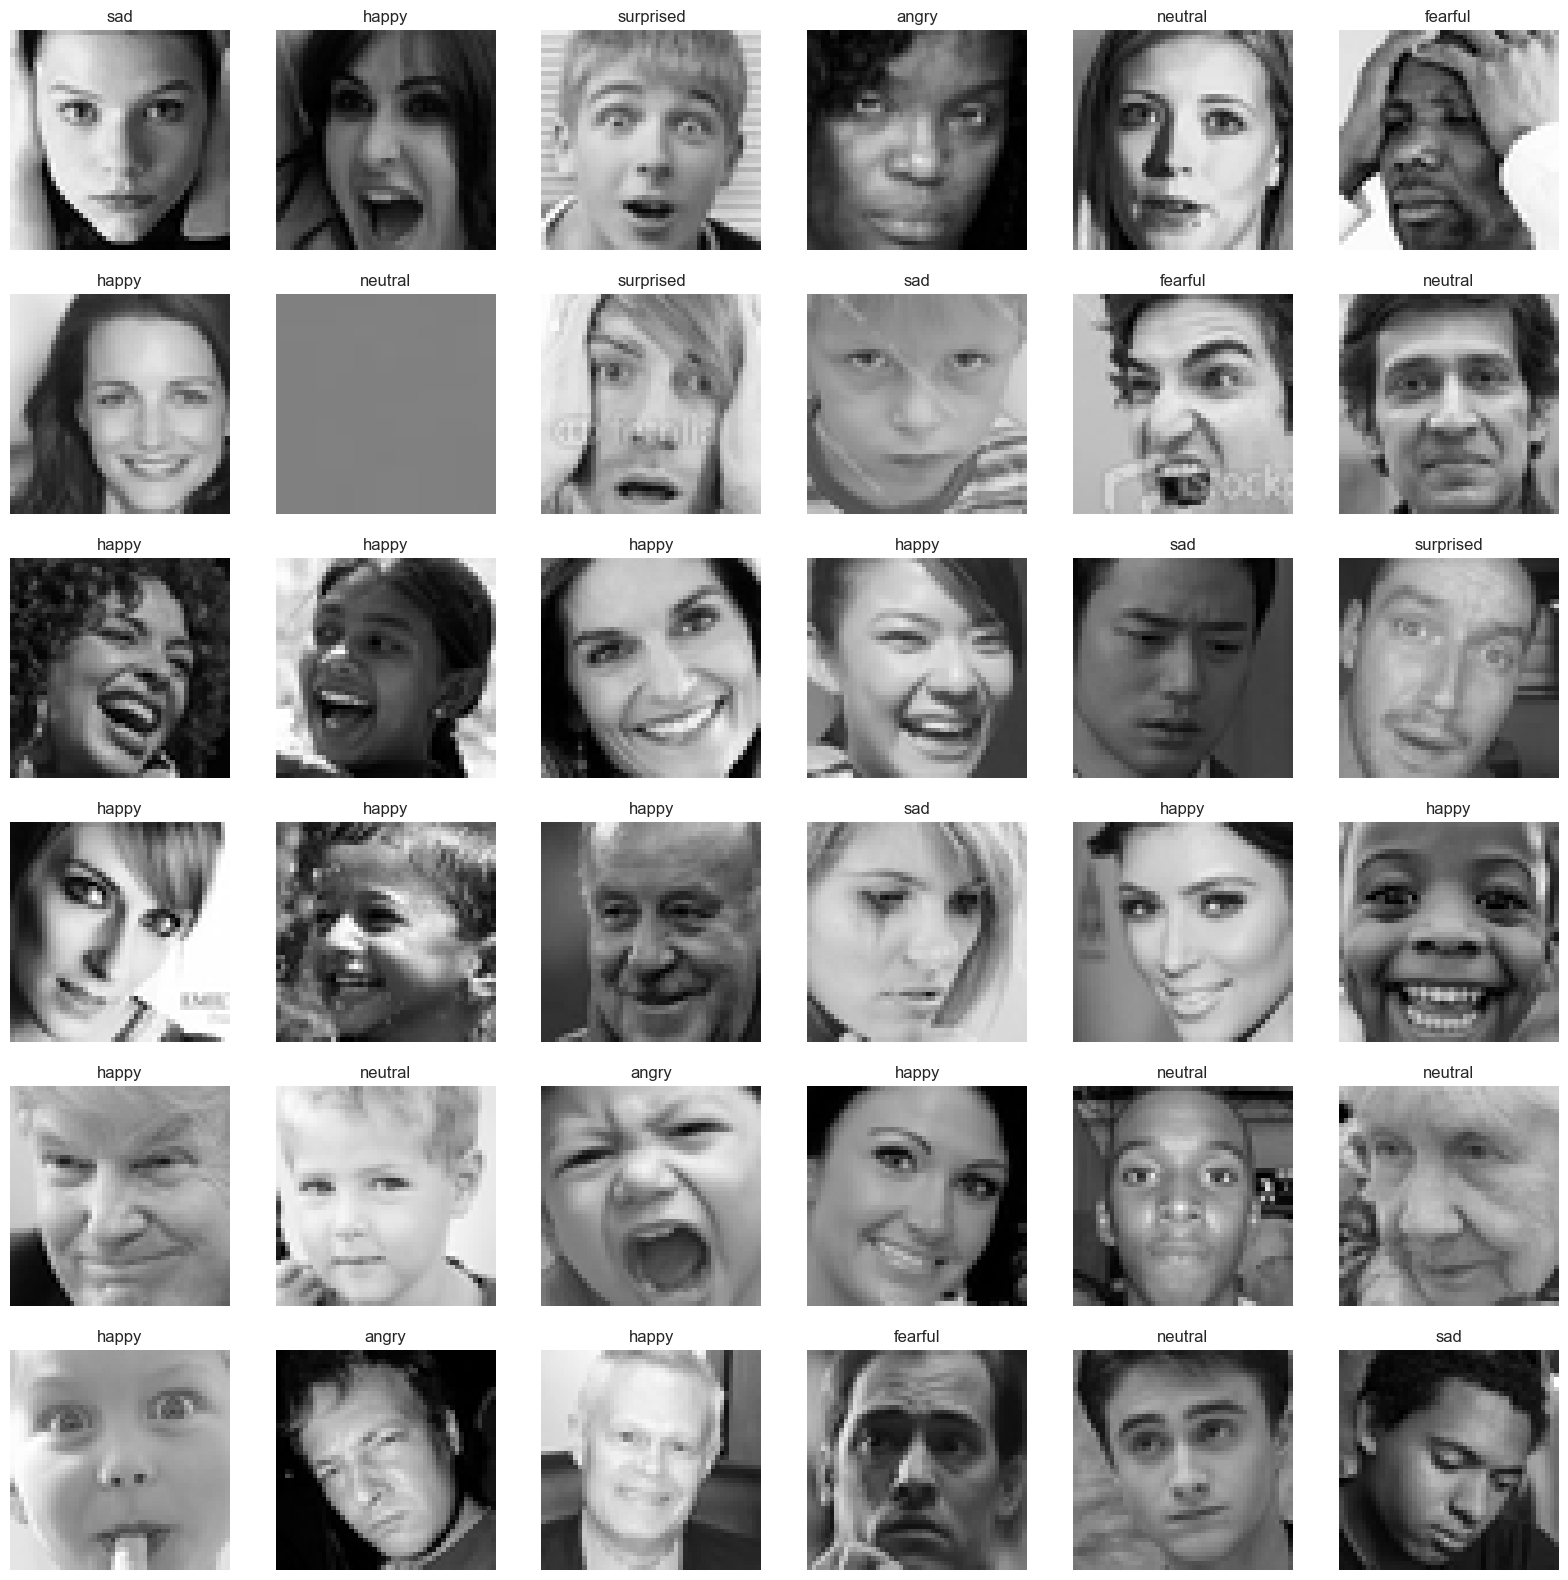

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

## **Split data**

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath ) :
    files = gb.glob(pathname= str( testpath + folder + '/*.png'))
    for file in files:
        image = cv2.imread(file)
        X_test.append(list(image))
        y_test.append(code[folder])


In [ ]:
print(f'we have {len(X_test)} items in X_test')

we have 7178 items in X_test


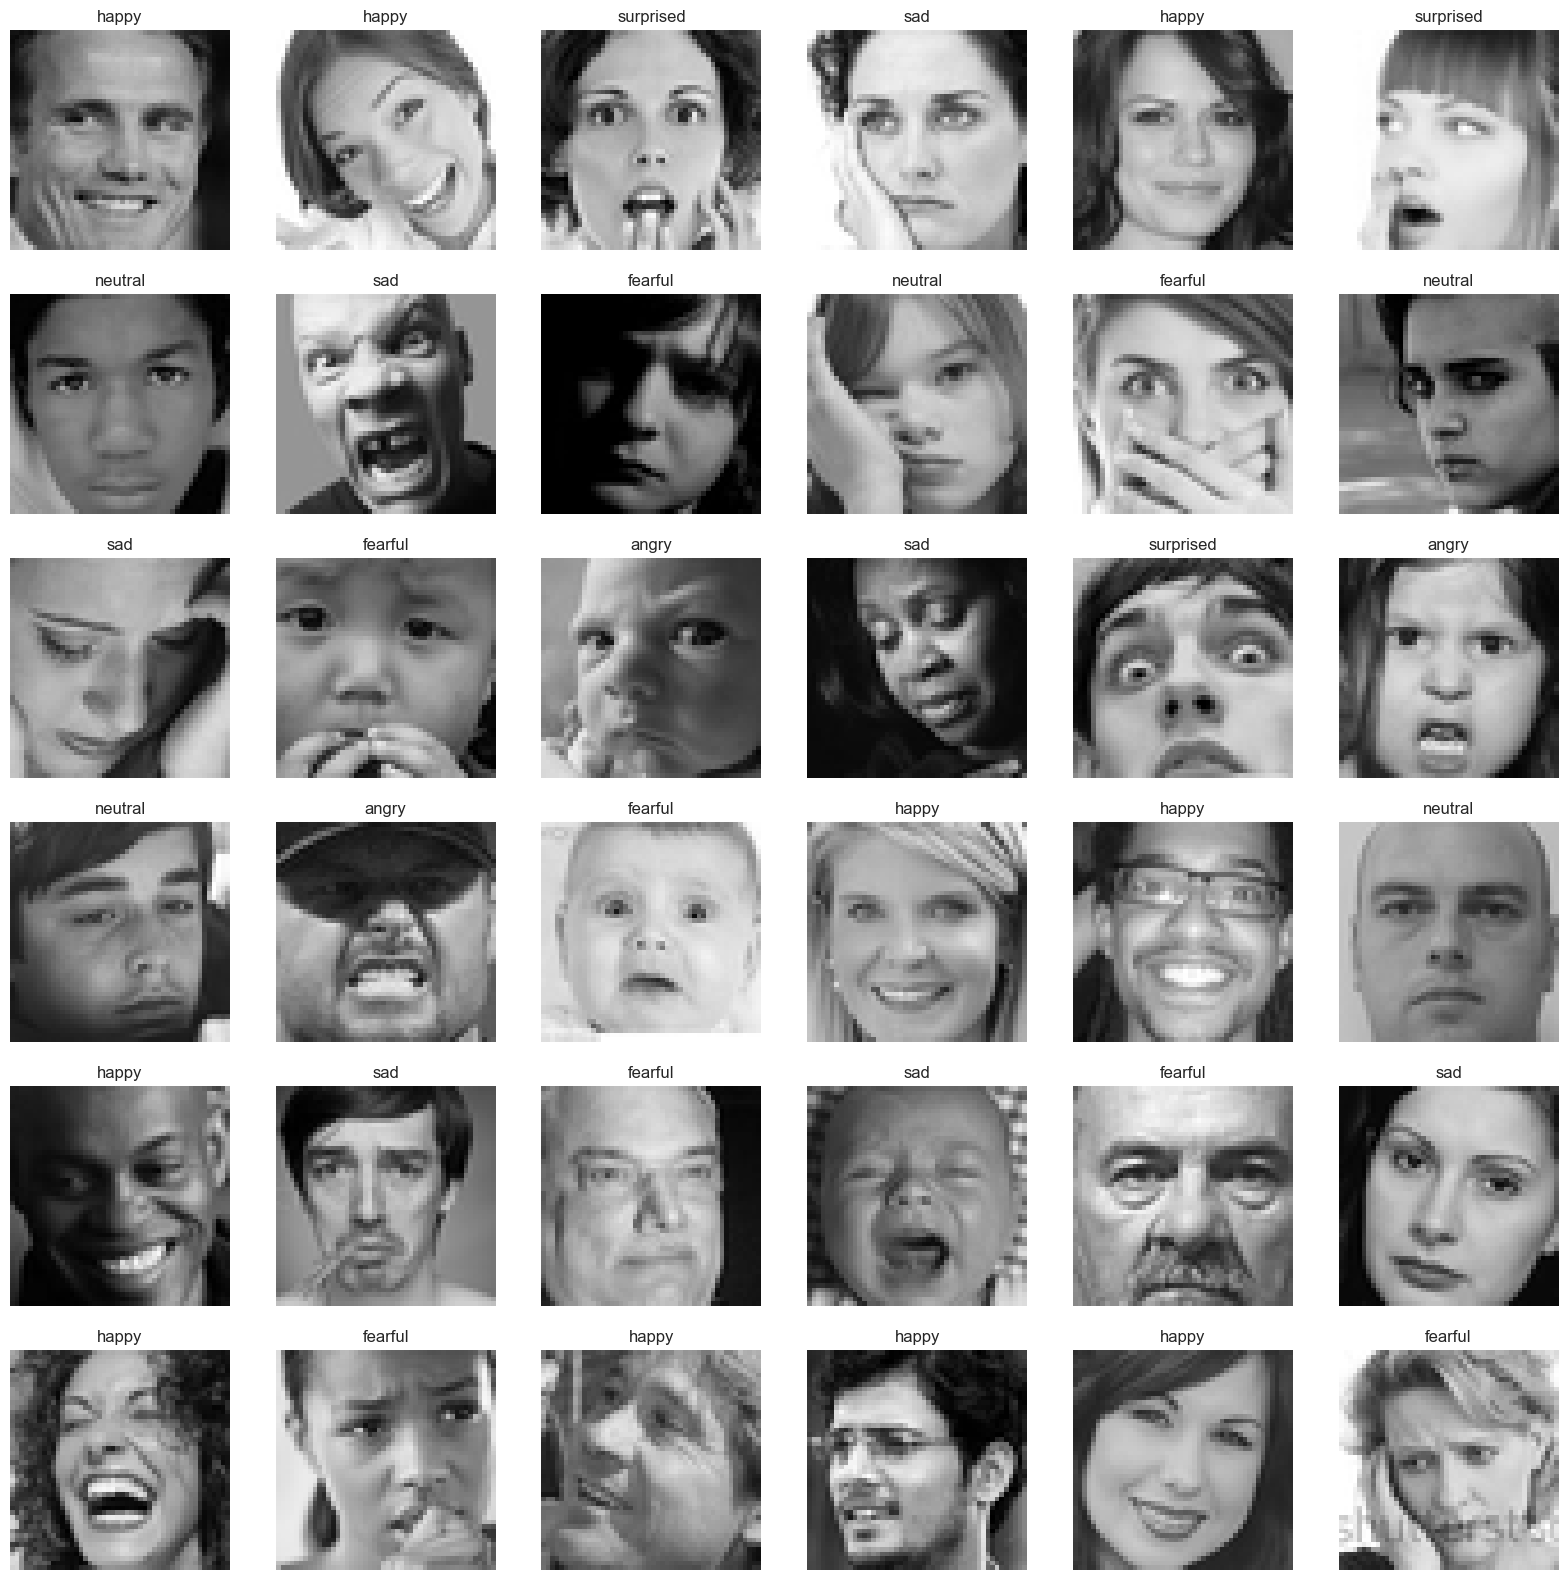

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
### for Jupyter
trainpath = 'Emotion_Detection/train/'
testpath = 'Emotion_Detection/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=trainpath, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=trainpath, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=testpath, **arg_test)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# **build model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                       

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train ,validation_data=valid,epochs=20)

Epoch 1/20
315/315 [==============================] - 105s 333ms/step - loss: 0.7373 - accuracy: 0.7387 - val_loss: 1.2370 - val_accuracy: 0.5913
Epoch 2/20
315/315 [==============================] - 111s 351ms/step - loss: 0.7309 - accuracy: 0.7477 - val_loss: 1.2369 - val_accuracy: 0.5885
Epoch 3/20
315/315 [==============================] - 110s 351ms/step - loss: 0.7268 - accuracy: 0.7438 - val_loss: 1.2040 - val_accuracy: 0.5935
Epoch 4/20
315/315 [==============================] - 107s 338ms/step - loss: 0.6426 - accuracy: 0.7798 - val_loss: 1.2341 - val_accuracy: 0.6069
Epoch 5/20
315/315 [==============================] - 107s 341ms/step - loss: 0.5884 - accuracy: 0.7982 - val_loss: 1.2941 - val_accuracy: 0.5976
Epoch 6/20
315/315 [==============================] - 106s 336ms/step - loss: 0.5666 - accuracy: 0.8052 - val_loss: 1.3337 - val_accuracy: 0.6030
Epoch 7/20
315/315 [==============================] - 106s 336ms/step - loss: 0.5613 - accuracy: 0.8109 - val_loss: 1.4251 -

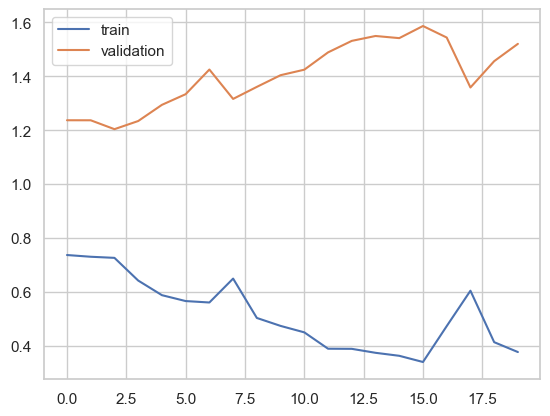

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

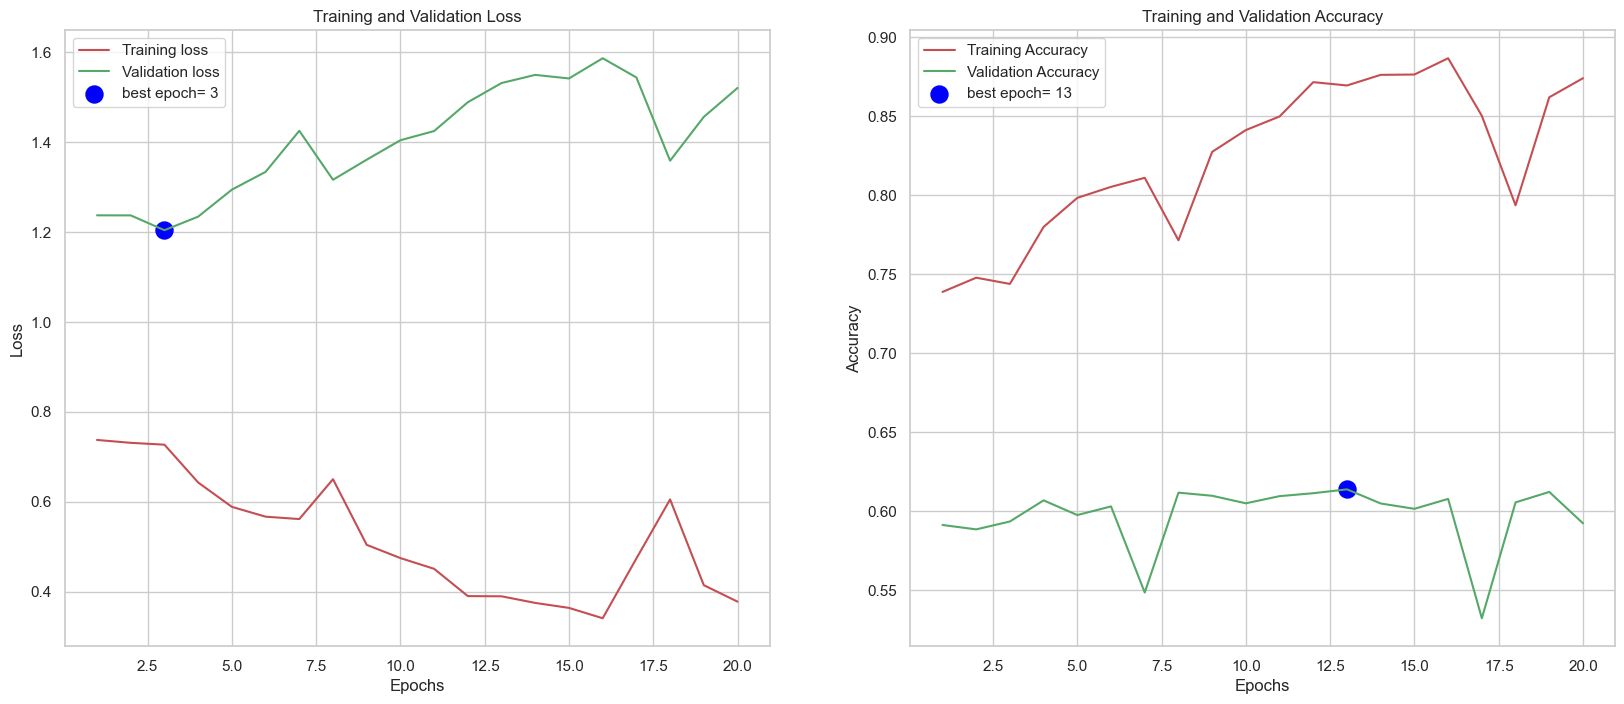

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
highest_acc = val_acc[index_acc]
Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
# plt.style.use('fivethirtyeight')

plt.subplot(121)
plt.plot(Epochs, train_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(Epochs, train_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , highest_acc,s=150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()